In [1]:
# Importing cell

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint

-----------------------------

# Physical Models of Living Systems

#### *Rafaele Gaudio 2057974*

-----------------------------

## Week 8: - Deadline 23 Dicember 

Study the stability of the excitatory-inhibitory two neurons system (Eq. 7.5. in the notes) for the parameters $M_{EE} = 1.25$, $M_{IE} = 1$, $M_{EI} = -1$, $M_{II} = 0$; $h_{E} = 10~Hz$, $h_I = - h_E$;  $\tau_E = 10~ms$ as a function of the free parameter $\tau_I$. 

Simulate a trajectory in the stable regime and one in the limit cycle regime (different $\tau_I$).


-----------------------------

The dynamics of our system is given by:

$$
\begin{cases}
\tau_E \frac{dv_E}{dt}= -v_E+\psi(h_E+ M_{EE}v_E+M_{EI}v_I)\\
\tau_I \frac{dv_I}{dt}=-v_I+\psi(h_I+ M_{IE}v_E+M_{II}v_I)
\end{cases}
$$
where $h_I$ and $h_E$ are externa stimuli and $\psi(\cdot)$ is the activation function (ReLU):

$$
\psi(\cdot)=\max(0,\cdot)
$$

In order to study the stability we impose:

$$
\dot{v}_E = \dot{v}_I =0
$$

whitch give us the fixed point $\bm{v^*}=(v_E ^*, v_I ^*)$, in this way we can perform a linear stability analysis by computing the Jacobian of the system in $\bm{v^*}$:

$$
J|_{\bm{v^*}}=
\begin{pmatrix} 
-(1-M_{EE})/\tau_{E} & M_{EI}/\tau_{E} \\
M_{IE}/\tau_{I} & -(1-M_{II})/\tau_{I}
\end{pmatrix}
$$

whitch has eigenvalues:

$$
\lambda= \frac{1}{2}\left( \frac{M_{EE}-1}{\tau{E}} + \frac{M_{II}-1}{\tau{I}} \pm \sqrt{\left(\frac{M_{EE}}{\tau_{E}}-\frac{M_{II}-1}{\tau_{I}} \right)^2 + \frac{4M_{EI}M_{IE}}{\tau_E\tau_I}}  \right)
$$


Given our parameters, the argument of the square root is negative so we obtain a conjugate pairs of complex eigenvalues. This implies that the behaviour around the fixed point is oscillatory: 

- if $\real(\lambda)<0$: the trajectory spirals into the fixed point and we obtain a stable equilibrium
- if $\real(\lambda)>0$: the trajectory spirals out from the fixed point and we obtain an unstable equilibrium

However, because of the non-linear terms involved into the equations, the unstable trajectory actually converges toward a limit cycle. 

The two behaviours of the dynamics are controlled by the parameter $\tau_I$:

- for $\tau_I<40~ms$ we have the stable regime
- for $\tau_I>40~ms$ we have the limit cycle regime (sustained oscillations).

Exempla of both regimes are simulatated below using $\tau_I=25~ms$ and $\tau_I=60~ms$ for a period of $1000~ms$.

In [2]:
# functions cell

def ReLU(x):
    return x * (x>0)


def E_I_neurons(y, t, tau_E, tau_I, h_E, h_I, M_EE, M_EI, M_IE, M_II):
    v_E = y[0]
    v_I = y[1]

    C_E = h_E + M_EE * v_E + M_EI * v_I
    C_I = h_I + M_IE * v_E + M_II * v_I

    dv_E = pow(tau_E,-1) * (ReLU(C_E) - v_E)
    dv_I = pow(tau_I,-1) * (ReLU(C_I) - v_I)

    return np.array([dv_E, dv_I])


def eig_finder(matrix, norm=False):
    from numpy import linalg as LA

    if(norm == True):
        k = np.sqrt(matrix.shape[0])
        eigenvalues = LA.eig(matrix/k)[0]

    else:
        eigenvalues = LA.eig(matrix)[0]

    Re_eig = eigenvalues.real
    Imm_eig = eigenvalues.imag

    return np.array([Re_eig, Imm_eig])


def J(tau_E, tau_I, M_EE, M_EI, M_IE, M_II):
    return np.matrix([[-(1-M_EE)/tau_E, M_EI/tau_E],[M_IE/tau_I, -(1-M_II)/tau_I]])

In [3]:
# global params control

M_EE = 1.25
M_IE = 1
M_EI = -1
M_II = 0
h_E = 10 
h_I = - h_E
tau_E = 10

v_E0 = 40
v_I0 = 20
y0=np.array([v_E0, v_I0])

time_period=1000
time_step=0.001
t=np.linspace(0,time_period,int(time_period/time_step))

In [4]:
# re_eigenvalues vs tau_I

tau_I = np.linspace(10,100,1000)

re_eign=[]

for i in tau_I:
    re_eign.append(eig_finder(J(tau_E, i, M_EE, M_EI, M_IE, M_II))[0][0])


# stable regime simulation (tau_I < 40)

tau_I_stable = 25

y_stable = odeint(E_I_neurons, y0, t, args=(tau_E, tau_I_stable, h_E, h_I, M_EE, M_EI, M_IE, M_II)) 
v_E_stable = y_stable[:,0]
v_I_stable = y_stable[:,1]


# limit cycle simulation (tau_I > 40)

tau_I_sustained = 60

y_sustained = odeint(E_I_neurons, y0, t, args=(tau_E, tau_I_sustained, h_E, h_I, M_EE, M_EI, M_IE, M_II)) 
v_E_sustained = y_sustained[:,0]
v_I_sustained = y_sustained[:,1]

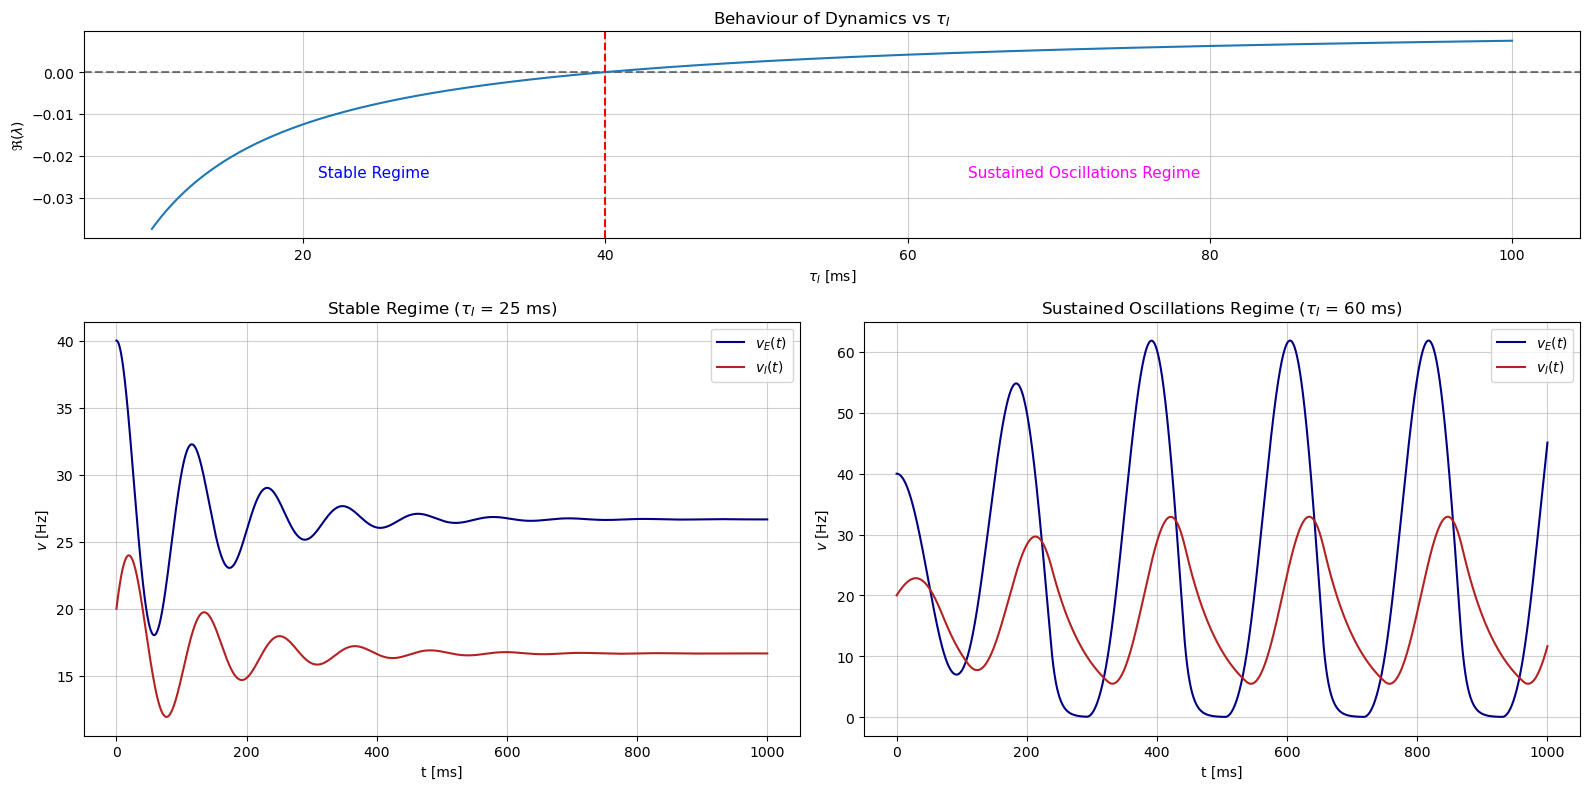

In [5]:
# plots

fig = plt.figure(tight_layout=True, figsize=(16,8))
gs = gridspec.GridSpec(2, 2, height_ratios=(1.5,3))

ax = fig.add_subplot(gs[0, :])
ax.set(title=r"Behaviour of Dynamics vs $\tau_I$",xlabel=r"$\tau_I$ [ms]",ylabel=r"$\Re(\lambda)$")
ax.axhline(y=0,ls="--",color="black",alpha=0.5)
ax.grid(alpha=0.6)
ax.plot(tau_I,re_eign)
ax.axvline(x=40,ls="--",color="red")
ax.text(21,-0.025, "Stable Regime",size=11,color="blue")
ax.text(64,-0.025, "Sustained Oscillations Regime",size=11,color="magenta")

ax = fig.add_subplot(gs[1, 0])
ax.set(title=r"Stable Regime ($\tau_I$ = {} ms)".format(tau_I_stable), xlabel="t [ms]", ylabel="$v$ [Hz]")
ax.grid(alpha=0.6)
ax.plot(t,v_E_stable,label="$v_E(t)$",color="navy")
ax.plot(t,v_I_stable,label="$v_I(t)$",color="firebrick")
ax.legend()

ax = fig.add_subplot(gs[1, 1])
ax.set(title=r"Sustained Oscillations Regime ($\tau_I$ = {} ms)".format(tau_I_sustained), xlabel="t [ms]", ylabel="$v$ [Hz]")
ax.grid(alpha=0.6)
ax.plot(t,v_E_sustained,label="$v_E(t)$",color="navy")
ax.plot(t,v_I_sustained,label="$v_I(t)$",color="firebrick")
ax.legend();